In [65]:
import os
import cv2
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
from keras.applications import vgg16

In [66]:
top_model = vgg16.VGG16(include_top = False,weights = 'imagenet',pooling = 'max')
for layer in top_model.layers[:-1]:
    layer.trainable = False

def load_images_from_folder(folder):
    images = []
    subfolders = [f.path for f in os.scandir(folder) if f.is_dir() ]
    for i in subfolders:
        print ("Reading", i)
        for filename in os.listdir(i):
            img = cv2.imread(os.path.join(i,filename))
            img = cv2.resize(img,(64,64))
            if img is not None:
                images.append(img)
    return images
Train=load_images_from_folder("AppData\Local\Programs\Python\Python35\dataset")
print(len(Train))

Reading AppData\Local\Programs\Python\Python35\dataset\34_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\angel_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\bell_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\bishop_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\butterfly_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\cape_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\cap_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\cold-shoulder
Reading AppData\Local\Programs\Python\Python35\dataset\kimono_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\long_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\puff_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\short_sleeve
Reading AppData\Local\Programs\Python\Python35\dataset\sleeveless
2007


In [67]:
import random
j=random.randrange(0, len(Train), 1)
print("Index Value:", j)
cv2.imshow('Image' ,Train[j])
cv2.waitKey(0)
cv2.destroyAllWindows()
print("Done Show")


Index Value: 1354
Done Show


In [68]:
images=[]
X=[]
X=Train
subfolders = [f.path for f in os.scandir("AppData\Local\Programs\Python\Python35\dataset") if f.is_dir() ]
print(subfolders)
for i in subfolders:
    images=os.listdir(i)
    print(len(images))
Y = []
j=0
l=0
while(j<len(subfolders)):
    print(l)
    images=os.listdir(subfolders[j])
    print("Images",len(images))
    a=j+1
    if j==0:
        Y.extend([str(a) for i in range(len(images))])
    else:
        Y.extend([str(a) for i in range(l, len(images)+l)])
    j=j+1
    l=l+len(images)
Y=pd.get_dummies(pd.DataFrame(Y))
Y = Y.values
print(Y)

['AppData\\Local\\Programs\\Python\\Python35\\dataset\\34_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\angel_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\bell_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\bishop_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\butterfly_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\cape_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\cap_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\cold-shoulder', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\kimono_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\long_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\puff_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\short_sleeve', 'AppData\\Local\\Programs\\Python\\Python35\\dataset\\sleeveless']
154
155
155
155
155
155
155
155
155
155
155
155
148
0
Images 154
154
Images 155
309
Images 155
464
Images 

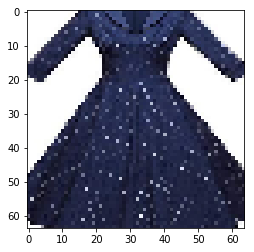

(2007, 64, 64, 3)
(2007, 13)
(1605, 64, 64, 3)
(1605, 13)
(402, 64, 64, 3)
(402, 13)


In [69]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(X[j], cv2.COLOR_BGR2RGB))
plt.show()

X = np.array(X,dtype = np.uint8)/255
X=X.reshape(2007,64,64,3)

print(X.shape)
print(Y.shape)

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,  Y,test_size=0.2)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)


In [71]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras_preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip = True, height_shift_range=0.2, width_shift_range=0.2)
datagen.fit(X_train, augment = True)
valgen = ImageDataGenerator()
valgen.fit(X_test)

model = Sequential()
for l in top_model.layers : 
    model.add(l)

model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(13,activation = tf.nn.softmax))
model.compile(optimizer = 'adam',metrics = ["accuracy"],loss = "categorical_crossentropy")
#model.fit(X_train, Y_train, epochs=40)
model.fit_generator(datagen.flow(X_train,Y_train,batch_size=64),epochs = 25,steps_per_epoch = 1605//64,validation_data = valgen.flow(X_test,Y_test,batch_size = 64),validation_steps = 402//64)
model.summary()
print("Evaluating Model")
print("Training set error",model.evaluate(X_train, Y_train))
print("Test set error",model.evaluate(X_test, Y_test))

Epoch 1/25
25/25 [==============================] - 45s 2s/step - loss: 2.6444 - acc: 0.0900 - val_loss: 2.5405 - val_acc: 0.0781
Epoch 2/25
25/25 [==============================] - 46s 2s/step - loss: 2.5208 - acc: 0.1241 - val_loss: 2.4970 - val_acc: 0.1598
Epoch 3/25
25/25 [==============================] - 47s 2s/step - loss: 2.4845 - acc: 0.1627 - val_loss: 2.4344 - val_acc: 0.1953
Epoch 4/25
25/25 [==============================] - 57s 2s/step - loss: 2.4629 - acc: 0.1636 - val_loss: 2.4218 - val_acc: 0.2041
Epoch 5/25
25/25 [==============================] - 47s 2s/step - loss: 2.4257 - acc: 0.1828 - val_loss: 2.3934 - val_acc: 0.1864
Epoch 6/25
25/25 [==============================] - 48s 2s/step - loss: 2.3616 - acc: 0.1890 - val_loss: 2.3257 - val_acc: 0.2071
Epoch 7/25
25/25 [==============================] - 48s 2s/step - loss: 2.3480 - acc: 0.2086 - val_loss: 2.2896 - val_acc: 0.2337
Epoch 8/25
25/25 [==============================] - 50s 2s/step - loss: 2.2947 - acc: 0.23